In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 
import yfinance as yf
from sklearn import preprocessing # how to import preprocessing
import sklearn.preprocessing
import numpy as np
from keras.models import load_model
from datetime import date
import datetime

In [2]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [3]:
ticker = "WFC"

In [4]:
#Downloading Data for Wells-Fargo
df = yf.download(ticker,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
#printing Df
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-09,52.860001,53.950001,52.799999,53.799999,46.526829,25750000
2017-06-12,53.980000,54.590000,53.939999,54.090000,46.777618,22791400
2017-06-13,54.349998,54.689999,54.279999,54.450001,47.088940,17966000
2017-06-14,54.090000,54.639999,53.570000,54.529999,47.158127,16575000
2017-06-15,54.040001,54.450001,53.810001,53.900002,46.613297,17232300
...,...,...,...,...,...,...
2022-06-02,45.119999,45.430000,44.509998,45.330002,45.330002,14633300
2022-06-03,44.830002,45.330002,44.610001,44.820000,44.820000,12568600
2022-06-06,45.340000,45.889999,44.959999,45.119999,45.119999,11867200


In [6]:
#Taking Open High Low and Close Columns
df = df[['Open','High','Low','Close','Adj Close']]

In [7]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2017-06-09,52.860001,53.950001,52.799999,53.799999,46.526829
2017-06-12,53.980000,54.590000,53.939999,54.090000,46.777618
2017-06-13,54.349998,54.689999,54.279999,54.450001,47.088940
2017-06-14,54.090000,54.639999,53.570000,54.529999,47.158127
2017-06-15,54.040001,54.450001,53.810001,53.900002,46.613297
...,...,...,...,...,...
2022-06-02,45.119999,45.430000,44.509998,45.330002,45.330002
2022-06-03,44.830002,45.330002,44.610001,44.820000,44.820000
2022-06-06,45.340000,45.889999,44.959999,45.119999,45.119999


In [8]:
# OHLC_avg = df.mean(axis = 1)
OHLC_avg = df[['Adj Close']]
HLC_avg = df[['High', 'Low', 'Close']].mean(axis = 1)
close_val = df[['Close']]
new_OHLC_avg=OHLC_avg.copy()

In [9]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(df) + 1, 1)

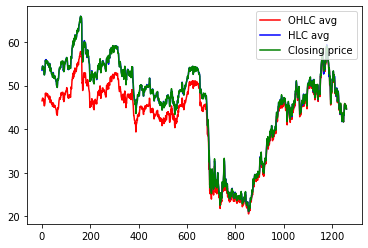

In [10]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [11]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [12]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [13]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [14]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [15]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [16]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
942/942 - 3s - loss: 0.0288 - 3s/epoch - 3ms/step
Epoch 2/10
942/942 - 1s - loss: 7.9719e-04 - 1s/epoch - 1ms/step
Epoch 3/10
942/942 - 1s - loss: 6.3322e-04 - 1s/epoch - 1ms/step
Epoch 4/10
942/942 - 1s - loss: 5.3247e-04 - 1s/epoch - 1ms/step
Epoch 5/10
942/942 - 1s - loss: 5.5759e-04 - 1s/epoch - 1ms/step
Epoch 6/10
942/942 - 1s - loss: 5.3943e-04 - 1s/epoch - 1ms/step
Epoch 7/10
942/942 - 1s - loss: 5.6093e-04 - 1s/epoch - 1ms/step
Epoch 8/10
942/942 - 1s - loss: 5.2234e-04 - 1s/epoch - 1ms/step
Epoch 9/10
942/942 - 1s - loss: 5.4361e-04 - 1s/epoch - 1ms/step
Epoch 10/10
942/942 - 1s - loss: 5.3892e-04 - 1s/epoch - 1ms/step


In [17]:
trainX

array([[[0.68017524]],

       [[0.68674323]],

       [[0.69489651]],

       [[0.69670847]],

       [[0.68243976]],

       [[0.68221338]],

       [[0.69014057]],

       [[0.67247433]],

       [[0.66160296]],

       [[0.65050511]],

       [[0.64959928]],

       [[0.6597913 ]],

       [[0.66568005]],

       [[0.69217902]],

       [[0.7250194 ]],

       [[0.71663964]],

       [[0.7250194 ]],

       [[0.7250194 ]],

       [[0.72003668]],

       [[0.72411367]],

       [[0.72071653]],

       [[0.70825938]],

       [[0.71120376]],

       [[0.72094291]],

       [[0.70712717]],

       [[0.70078526]],

       [[0.7028237 ]],

       [[0.70599466]],

       [[0.70463556]],

       [[0.68855499]],

       [[0.69082002]],

       [[0.70871245]],

       [[0.70531551]],

       [[0.70078526]],

       [[0.6688506 ]],

       [[0.68334589]],

       [[0.68651665]],

       [[0.68491998]],

       [[0.6799008 ]],

       [[0.66712526]],

       [[0.66028143]],

       [[0.66415

In [18]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
trainPredict

array([[0.6755066 ],
       [0.68200123],
       [0.69005257],
       [0.69184005],
       [0.67774665],
       [0.6775228 ],
       [0.6853575 ],
       [0.66788185],
       [0.6571008 ],
       [0.64607537],
       [0.64517456],
       [0.6553022 ],
       [0.6611464 ],
       [0.6873704 ],
       [0.71968627],
       [0.711461  ],
       [0.71968627],
       [0.71968627],
       [0.7147972 ],
       [0.7187979 ],
       [0.7154646 ],
       [0.7032208 ],
       [0.7061176 ],
       [0.7156868 ],
       [0.7021065 ],
       [0.69585985],
       [0.69786847],
       [0.7009916 ],
       [0.69965315],
       [0.6837914 ],
       [0.6860286 ],
       [0.7036667 ],
       [0.70032275],
       [0.69585985],
       [0.6642904 ],
       [0.67864275],
       [0.68177736],
       [0.680199  ],
       [0.67523503],
       [0.6625798 ],
       [0.65578896],
       [0.6596383 ],
       [0.6614486 ],
       [0.6424115 ],
       [0.6421845 ],
       [0.6625798 ],
       [0.66280615],
       [0.659

In [20]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 0.80


In [22]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 1.01


In [23]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [24]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

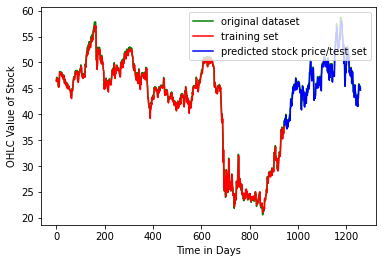

In [25]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Stock')
plt.show()

In [26]:
model3=Sequential()
model3.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model3.add(LSTM(16))
model3.add(Dense(1))
model3.add(Activation('linear'))
model3.compile(loss='mean_squared_error', optimizer='adam') 

In [27]:
import time

In [28]:

# PREPARATION OF TIME SERIES DATASE 
new_OHLC_avg = np.reshape(new_OHLC_avg.values, (len(new_OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
new_OHLC_avg = scaler.fit_transform(new_OHLC_avg)

start = time.time()
# for i in range(30):
#     trainX3, trainY3=new_dataset(new_OHLC_avg, 1)
#     trainX3 = np.reshape(
# trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
#     model3.fit(trainX3, trainY3, epochs=5, batch_size=1, verbose=2)

# model3.save('lstm_model3.h5')
# model3 = load_model('lstm_model3.h5')

#Prediction for next 7 Days
#no.of days
for i in range(30):
    trainX3, trainY3=new_dataset(new_OHLC_avg, 1)
    trainX3 = np.reshape(trainX3, (trainX3.shape[0], 1, trainX3.shape[1]))
    model3.fit(trainX3, trainY3, epochs=5, batch_size=1, verbose=2)
    
    last_val = new_OHLC_avg[-1]
    next_val = model3.predict(np.reshape(last_val, (1,1,1)))
    new_OHLC_avg = np.append(new_OHLC_avg, next_val[0])
    new_OHLC_avg=new_OHLC_avg.reshape(-1,1)
end = time.time()

print('==================================')
print(end-start)
#no.of days
next_val = scaler.inverse_transform(new_OHLC_avg[-30:])




Epoch 1/5
1257/1257 - 4s - loss: 0.0195 - 4s/epoch - 3ms/step
Epoch 2/5
1257/1257 - 2s - loss: 8.8648e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1257/1257 - 2s - loss: 6.9142e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1257/1257 - 2s - loss: 6.1966e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1257/1257 - 2s - loss: 6.3272e-04 - 2s/epoch - 1ms/step
Epoch 1/5
1258/1258 - 2s - loss: 6.2697e-04 - 2s/epoch - 1ms/step
Epoch 2/5
1258/1258 - 2s - loss: 6.2943e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1258/1258 - 2s - loss: 6.4549e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1258/1258 - 2s - loss: 6.3071e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1258/1258 - 2s - loss: 6.2004e-04 - 2s/epoch - 1ms/step
Epoch 1/5
1259/1259 - 2s - loss: 6.2837e-04 - 2s/epoch - 1ms/step
Epoch 2/5
1259/1259 - 2s - loss: 6.2291e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1259/1259 - 2s - loss: 6.2521e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1259/1259 - 2s - loss: 6.3132e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1259/1259 - 2s - loss: 6.4217e-04 - 2s/epoch - 1ms/step
Epoch 1/5
1260

Epoch 1/5
1282/1282 - 2s - loss: 5.3361e-04 - 2s/epoch - 1ms/step
Epoch 2/5
1282/1282 - 2s - loss: 5.4081e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1282/1282 - 2s - loss: 5.4598e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1282/1282 - 2s - loss: 5.3951e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1282/1282 - 2s - loss: 5.6109e-04 - 2s/epoch - 1ms/step
Epoch 1/5
1283/1283 - 2s - loss: 5.4467e-04 - 2s/epoch - 1ms/step
Epoch 2/5
1283/1283 - 2s - loss: 5.5317e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1283/1283 - 2s - loss: 5.5175e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1283/1283 - 2s - loss: 5.2883e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1283/1283 - 2s - loss: 5.4473e-04 - 2s/epoch - 1ms/step
Epoch 1/5
1284/1284 - 2s - loss: 5.3731e-04 - 2s/epoch - 1ms/step
Epoch 2/5
1284/1284 - 2s - loss: 5.4588e-04 - 2s/epoch - 1ms/step
Epoch 3/5
1284/1284 - 2s - loss: 5.3091e-04 - 2s/epoch - 1ms/step
Epoch 4/5
1284/1284 - 2s - loss: 5.3782e-04 - 2s/epoch - 1ms/step
Epoch 5/5
1284/1284 - 2s - loss: 5.3645e-04 - 2s/epoch - 1ms/step
Epoch 1/5


In [29]:
#Creating DataFrames to plot output
final_val = []
next_val1 = []
next_val1 = np.append(next_val1, np.repeat(np.nan, len(OHLC_avg[897:])))
next_val1 = next_val1.reshape(-1,1)
for i in next_val1:
    final_val.append(i)
for i in next_val:
    final_val.append(i)


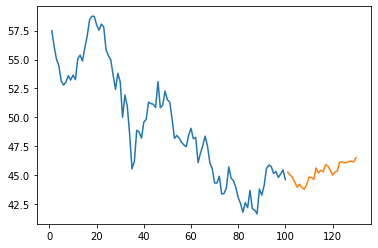

In [30]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, OHLC_avg[-100:])
plt.plot(plot_pred, scaler.inverse_transform(new_OHLC_avg[-30:]))

In [31]:
#To be stored in DB (final_val)
final_val[-30:]

[array([45.27965744]),
 array([45.03152993]),
 array([44.82042936]),
 array([44.39687631]),
 array([43.96867128]),
 array([44.23301242]),
 array([43.94860905]),
 array([43.79175045]),
 array([44.19358896]),
 array([44.83531387]),
 array([44.82607591]),
 array([44.64616225]),
 array([45.63777782]),
 array([45.20450887]),
 array([45.44851468]),
 array([45.31134505]),
 array([45.92206057]),
 array([45.81571599]),
 array([45.44780687]),
 array([45.02142258]),
 array([45.28482377]),
 array([45.37114482]),
 array([46.13043232]),
 array([46.17178804]),
 array([46.07688678]),
 array([46.10919572]),
 array([46.20150699]),
 array([46.22853125]),
 array([46.15365125]),
 array([46.52493099])]

In [32]:
scaler.inverse_transform(new_OHLC_avg[-30:])

array([[45.27965744],
       [45.03152993],
       [44.82042936],
       [44.39687631],
       [43.96867128],
       [44.23301242],
       [43.94860905],
       [43.79175045],
       [44.19358896],
       [44.83531387],
       [44.82607591],
       [44.64616225],
       [45.63777782],
       [45.20450887],
       [45.44851468],
       [45.31134505],
       [45.92206057],
       [45.81571599],
       [45.44780687],
       [45.02142258],
       [45.28482377],
       [45.37114482],
       [46.13043232],
       [46.17178804],
       [46.07688678],
       [46.10919572],
       [46.20150699],
       [46.22853125],
       [46.15365125],
       [46.52493099]])

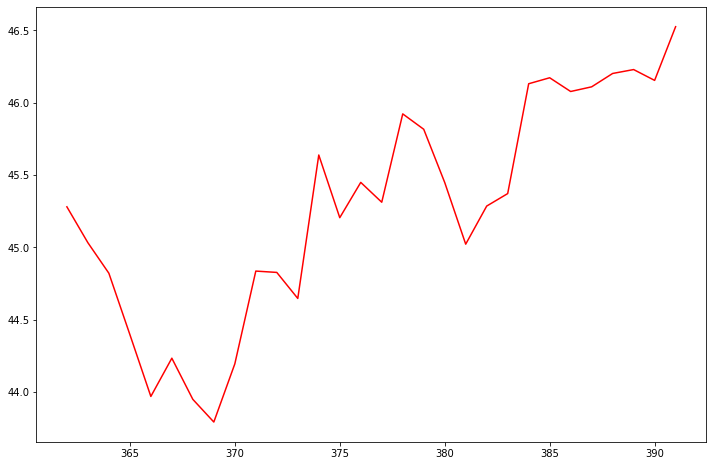

In [33]:
plt.figure(figsize = (12,8))
# plt.plot(new_OHLC_avg[897:], 'g', label = 'original dataset')
plt.plot(final_val, 'r', label = 'predicted')

In [34]:
next_val

array([[45.27965744],
       [45.03152993],
       [44.82042936],
       [44.39687631],
       [43.96867128],
       [44.23301242],
       [43.94860905],
       [43.79175045],
       [44.19358896],
       [44.83531387],
       [44.82607591],
       [44.64616225],
       [45.63777782],
       [45.20450887],
       [45.44851468],
       [45.31134505],
       [45.92206057],
       [45.81571599],
       [45.44780687],
       [45.02142258],
       [45.28482377],
       [45.37114482],
       [46.13043232],
       [46.17178804],
       [46.07688678],
       [46.10919572],
       [46.20150699],
       [46.22853125],
       [46.15365125],
       [46.52493099]])

In [35]:
next_val.reshape(1,-1).tolist()[0]

[45.27965743664049,
 45.031529934810806,
 44.82042935690788,
 44.39687630529943,
 43.968671275541965,
 44.23301242332741,
 43.94860905079463,
 43.791750447072445,
 44.193588956841495,
 44.835313866249635,
 44.82607591159854,
 44.64616224982865,
 45.63777782103557,
 45.204508871815506,
 45.448514684590464,
 45.31134505492264,
 45.92206056986879,
 45.81571598523533,
 45.44780687382513,
 45.02142257915534,
 45.28482377245177,
 45.37114482295851,
 46.13043232105906,
 46.17178804265677,
 46.07688677804936,
 46.109195722180175,
 46.20150699112537,
 46.22853125166421,
 46.153651245264655,
 46.524930992505915]